

[GAN Learning Resources](https://www.youtube.com/watch?v=AALBGpLbj6Q)

## 1. Import Dependencies and Data

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

In [2]:
# !pip install tensorflow-gpu tensorflow-datasets ipywidgets

In [3]:
# !pip list

In [4]:
# Bringing in tensorflow
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
# for gpu in gpus:
#     print(gpu)

#Collecting Tensorflow Dataset for fashion mnist
import tensorflow_datasets as tfds
#matplotlib for Visualization of Stuff
from matplotlib import pyplot as plt

In [6]:
#tensorflow Dataset api from the data Source
ds = tfds.load('fashion_mnist', split="train")

In [7]:
# ds.as_numpy_iterator().next()
# ds.as_numpy_iterator().next().keys()
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

## 2. Visualize Data and build Dataset

In [8]:
#Do some data transformation
import numpy as np
#Setup Connectio aka iterator
dataiterator = ds.as_numpy_iterator()

In [9]:
# Getting Data out of the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [20]:
# dataiterator.next()['image'].shape
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

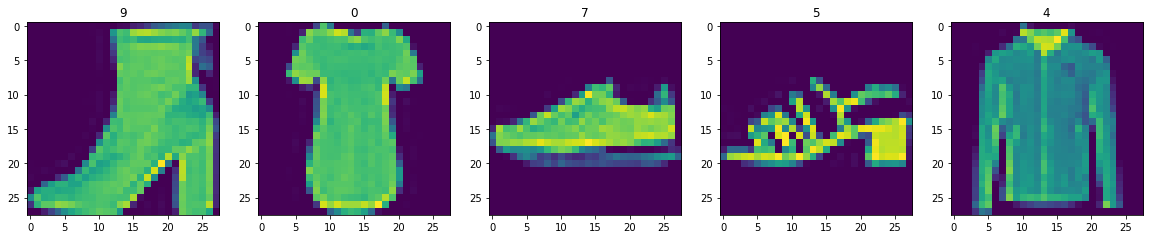

In [12]:
#Setup the subplot formatting
fig, ax = plt.subplots(ncols=5, figsize=(20,20))

#Loop five times and get images
for idx in range(5):
    #grap an image and label
    sample = dataiterator.next()
    #Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [24]:
#Scale and return images only
def scale_images(data):
    image = data['image']
    return image/255

In [26]:
#Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
#Running the dataset through thescale_images preprocessing step
ds = ds.map(scale_images)
#Cache the dataset for that batch
ds = ds.cache()
#Shuffle it up
ds = ds.shuffle(60000)
#Batch into 128 images per sample
ds = ds.batch(128)
#Reduce the likelihood of bottlenecking
ds = ds.prefetch(64)

In [27]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## 3. Build Neural Network